## Binary Classification with a Bank Churn Dataset (Kaggle)

https://www.kaggle.com/competitions/playground-series-s4e1/overview



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [12]:
!pip install geopandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 7.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 7.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.1 MB/s eta 0:00:00:00:0100:01


In [2]:
df =pd.read_csv('train.csv')

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Exited', ylabel='Count'>

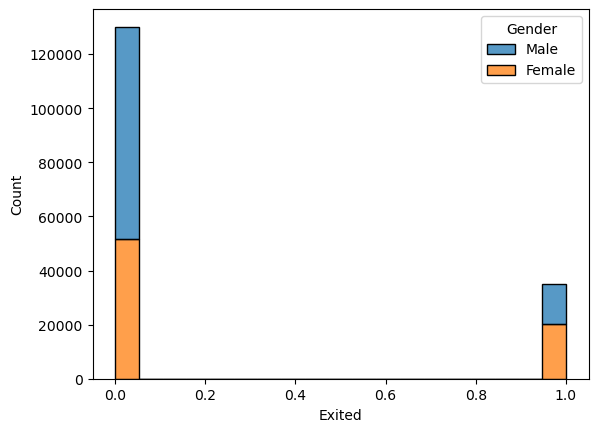

In [6]:
sns.histplot(data=df, x="Exited", hue="Gender", multiple="stack")


In [30]:
df.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         78643
           1         15572
Germany    0         21492
           1         13114
Spain      0         29978
           1          6235
Name: Exited, dtype: int64

In [ ]:
# Calculate the total counts for each Geography
total_counts = df.groupby('Geography')['Exited'].count()

# Calculate the percentage of each 'Exited' value within each Geography
percentage_df = df.groupby(['Geography', 'Exited'])['Exited'].count() / total_counts * 100

# Display the result
print(percentage_df)

We can see that the dataset is imbalas, there are more people staying with the bank that churning. We'll need to do something later on.

<AxesSubplot:xlabel='Geography', ylabel='Count'>

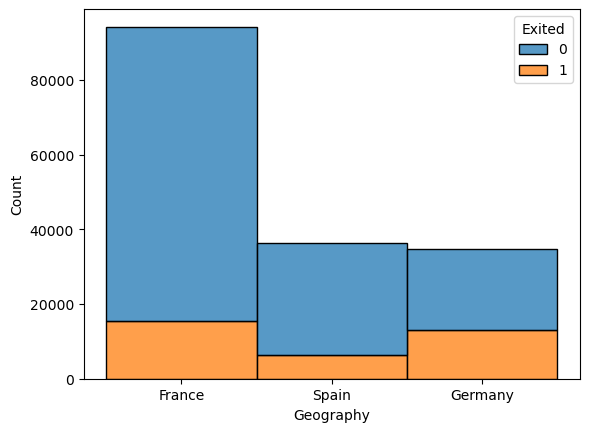

In [11]:
sns.histplot(data=df, x="Geography", hue="Exited", multiple="stack")

/var/folders/9b/8cypzlq97vqb_55gh3nzk8780000gq/T/ipykernel_1429/888547348.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


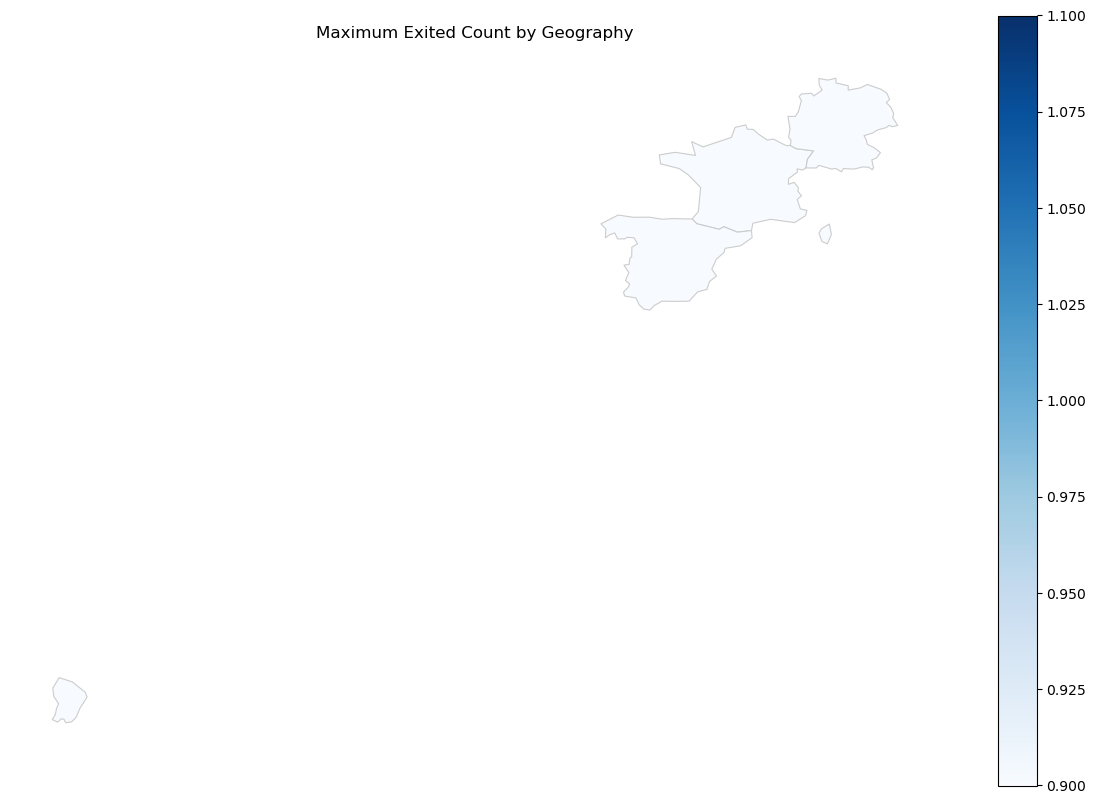

In [14]:
import geopandas as gpd

country_counts = df.groupby('Geography')['Exited'].max().reset_index()

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with the country counts DataFrame
world = world.merge(country_counts, how='left', left_on='name', right_on='Geography')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Exited', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Maximum Exited Count by Geography')
ax.set_axis_off()

plt.show()








In [15]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [16]:
df_new = df.drop(columns = ['id', 'CustomerId', 'Surname'])

In [17]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [20]:
df_encoded = pd.get_dummies(df_new, columns=['Geography', 'Gender'], drop_first = True)


In [21]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,1


## Decision Tree Classifier

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, auc


In [25]:
X= df_encoded.drop(columns = ['Exited'])

In [26]:
y=df_encoded['Exited']

In [27]:
# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
pipeline = Pipeline([

    ('classifier', DecisionTreeClassifier(random_state=42)) ])

In [29]:
# Define the hyperparameters grid to search over
param_grid = {
    'classifier__max_depth': [None, 3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}


In [31]:
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 3, 5, 7],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [32]:
# Print the best hyperparameters and corresponding AUC score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

Best Hyperparameters: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
Best AUC Score: 0.86339160292809


In [33]:
# Predict probabilities on the test set using the best model
probabilities = grid_search.predict_proba(X_test)[:, 1]

In [38]:

# Calculate ROC curve and AUC for the positive class
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

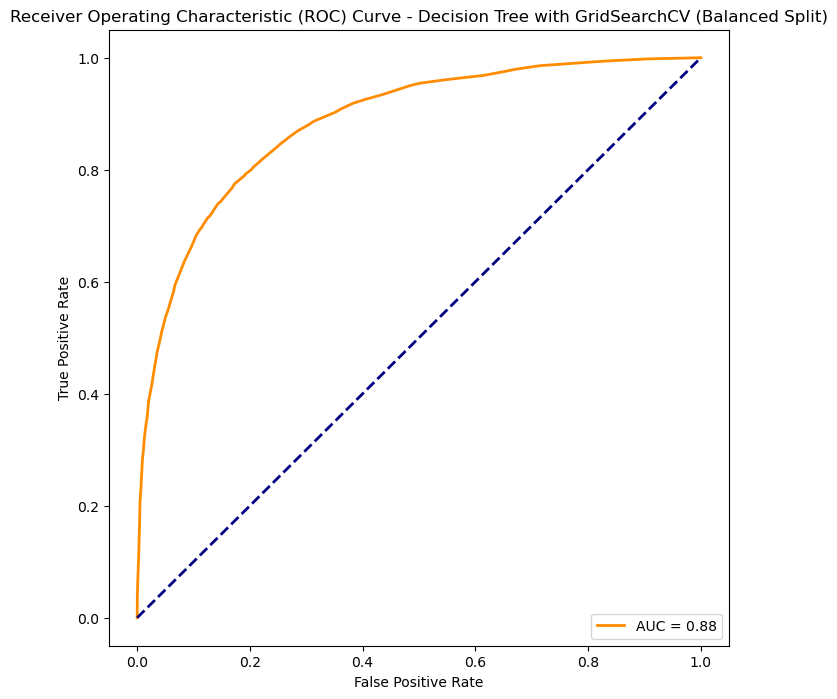

In [39]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree with GridSearchCV (Balanced Split)')
plt.legend(loc="lower right")
plt.show()

## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

Best Hyperparameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best AUC Score: 0.8630001448753217


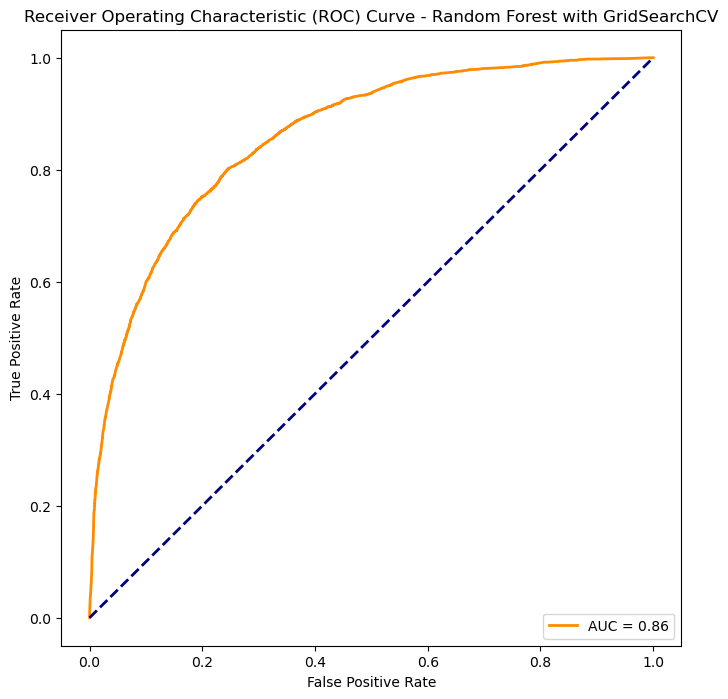

In [41]:
# Create a pipeline Random Forest Classifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters grid to search over
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}


# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='precision', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding AUC score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

# Predict probabilities on the test set using the best model
probabilities = grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for the positive class
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest with GridSearchCV')
plt.legend(loc="lower right")
plt.show()

In [44]:
!pip install plotly


In [43]:
import plotly.express as px

In [55]:
df.groupby('Geography')['Exited'].mean().reset_index()

,Geography,Exited
0,France,0.165282
1,Germany,0.378952
2,Spain,0.172176


In [56]:
# Group by 'Geography' and calculate the maximum count of 'Exited'
mean_exit_count = df.groupby('Geography')['Exited'].mean().reset_index()

# Plotly Express choropleth map
fig = px.choropleth(
    mean_exit_count,
    locations='Geography',
    color='Exited',
    color_continuous_scale='Viridis',
    range_color=(mean_exit_count['Exited'].min(), mean_exit_count['Exited'].max()),  # Set the range for color scale
    scope ='europe',
    title='Maximum Count of Exited by Geography',
    labels={'Exited': 'Mean Exit Count'},
)

fig.update_geos(projection_type="natural earth")  # Set projection type

fig.show()

In [61]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# Load GeoJSON file using geopandas
geojson_url = 'https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson'
geojson_gdf = gpd.read_file(geojson_url)

# Assuming you have a DataFrame df with columns 'Geography' and 'Exited'
# Replace 'Geography' and 'Exited' with your actual column names

# Group by 'Geography' and calculate the mean of 'Exited'
mean_exit_count = df.groupby('Geography')['Exited'].mean().reset_index()

# Merge with GeoJSON data
merged_gdf = pd.merge(geojson_gdf, mean_exit_count, how='left', left_on='ADMIN', right_on='Geography')

# Plotly Express choropleth map
fig = px.choropleth(
    merged_gdf,
    geojson=merged_gdf.geometry,
    locations=merged_gdf.index,
    color='Exited',
    color_continuous_scale='Viridis',
    range_color=(merged_gdf['Exited'].min(), merged_gdf['Exited'].max()),
    scope ='europe',
    title='Mean Exit Count by Geography',
    labels={'Exited': 'Mean Exit Count'},
)

fig.update_geos(projection_type="natural earth")  # Set projection type

fig.show()

